### Student Information
Name: 楊文彣

Student ID: 111065535

GitHub ID: ywen9901

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

---

# Outline

- [Part 1](#part-1) Take home exercises
- [Part 2](#part-2) Preprocess another dataset
- [Part 3](#part-3) Tasks on the new dataset
- [Part 4](#part-4) Review the process

# **Part 1**

Take home exercises

In [1]:
%load_ext autoreload
%autoreload 2

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(data_home="C:/Users/Alulu/scikit_learn_data/", subset='train', categories=categories,
                                  shuffle=True, random_state=42)
# 

In [2]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

import pandas as pd
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### >>> **Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
##### Answer #####
print(X[X['category'] == 2][:5])
print("--------------------------------")
print(X[X['text'].str.contains('john')][:5])

                                                 text  category category_name
7   From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2       sci.med
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2       sci.med
16  From: texx@ossi.com (Robert "Texx" Woodworth) ...         2       sci.med
28  From: rind@enterprise.bih.harvard.edu (David R...         2       sci.med
--------------------------------
                                                  text  category  \
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
198  From: johnm@spudge.lonestar.org (John Munsch) ...         1   
200  From: johnsd2@rpi.edu (Dan Johnson) Subject: R...         3   
208  From: backon@vms.huji.ac.il Subject: Re: diet ...         2   
371  From: johnsh@rpi.edu (Hugh Johnson) Subject: R...         1   

              category_name  
2    soc.religion.christian  
198           comp.graphics  


In [4]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
dummy_series.to_frame().T

result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
X.dropna(inplace=True)

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

**Answer:** <br/>
`pandas.isnull()` 這個函數會接受一個純量或是陣列相似類型的對象去指示有沒有為 NaN 的值

- Row 0: `np.nan` 會轉換成 numeric array 的 NaN (O)
- Row 1: 因為值為空，會被當成 NaN (O)
- Row 2: 是 String 'NaN' (X)
- Row 3: 是 String 'None' (X)
- Row 4: 因為是 None 值，會被轉換成 object array 中的 None (O)
- Row 5: 是 empty String，而不是空值

In [5]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [6]:
X.duplicated()
sum(X.duplicated())
sum(X.duplicated('text'))
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
X_sample = X.sample(n=1000,random_state=42) # random state

### >>> **Exercise 6 (take home):**
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

**Answer:** <br/>
根據程式碼可以看見 concat dummy record 和 `duplicate()` 與 `drop_duplicates()` 影響了 row 數，最後又利用 `sample()` 建立已經被處理過的 X 的子樣本，在裡面隨機抽出 1000 行 record 作為 X_sample

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

277
category_name
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

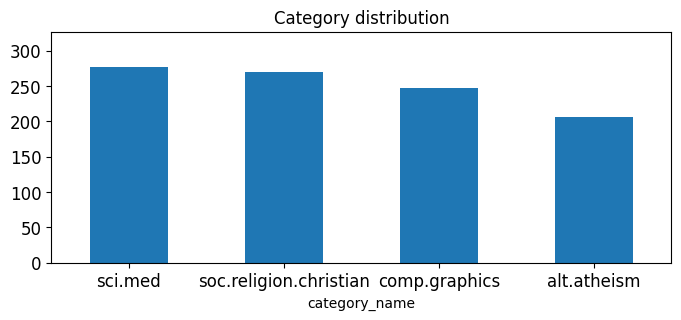

In [7]:
##### Answer #####

# 可以利用 value_counts() 來找到最大值
# 這邊加上 50 會讓圖表上方保留一些空間

import matplotlib.pyplot as plt
%matplotlib inline

print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

(0.0, 649.0)

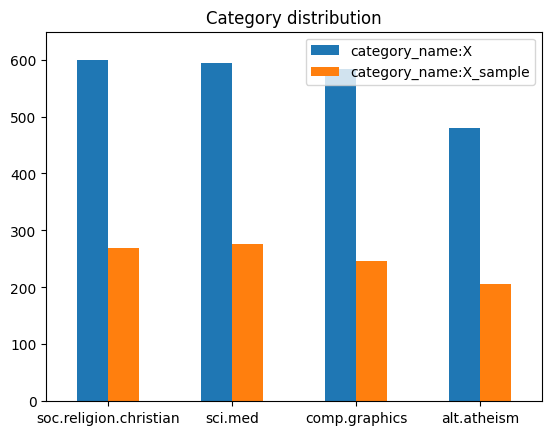

In [8]:
##### Answer #####
df_test = pd.DataFrame({
    'category_name:X': X.category_name.value_counts(), 
    'category_name:X_sample': X_sample.category_name.value_counts()
    }, index=X.category_name.value_counts().index)
ax = df_test.plot.bar()
ax.set_title('Category distribution')
ax.set_xlabel(None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylim(0, max(df_test.max()) + 50)

In [9]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')

'''
LookupError: 
**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
'''
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alulu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [10]:
##### Answer #####
index = 0
for index, i in enumerate(X_counts[4,1:].toarray().squeeze()):
    if i == 1:
        _index = index
        break
print(count_vect.get_feature_names_out()[_index])

00pm


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

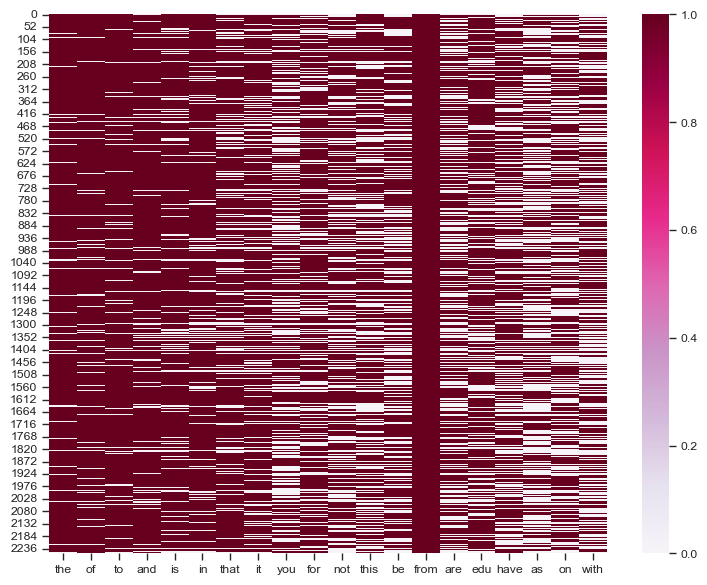

In [11]:
##### Answer #####
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
sns.set_context("paper", font_scale=1)   

# find the top 20 labels
feature_names = count_vect.get_feature_names_out()
frequencies = X_counts.toarray().sum(axis=0)
sorted_indices = (-frequencies).argsort()

top_features = [feature_names[i] for i in sorted_indices[:20]]
top_frequencies = [frequencies[i] for i in sorted_indices[:20]]

df_todraw = pd.DataFrame(X_counts[:, sorted_indices[:20]].toarray(), columns=top_features, index=X.index)

plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=False)
plt.show()


### >>> **Exercise 12 (take home):**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

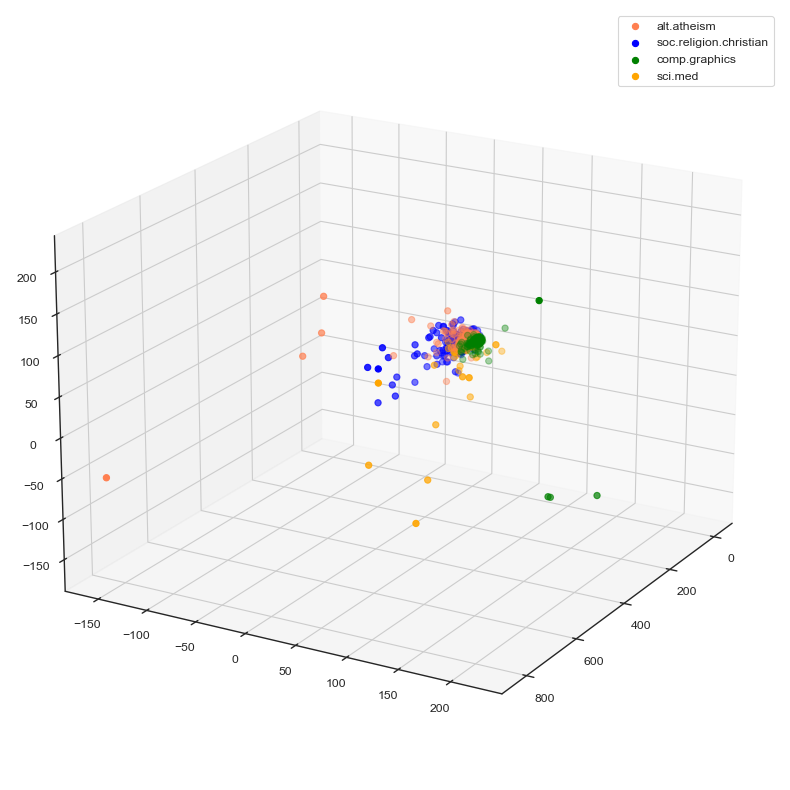

In [12]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111, projection='3d')

col = ['coral', 'blue', 'green', 'orange']

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category][:, 0]
    ys = X_reduced[X['category_name'] == category][:, 1]
    zs = X_reduced[X['category_name'] == category][:, 2]
   
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.view_init(elev=20, azim=30)
plt.legend()
plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [13]:
import plotly.express as px

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

df_test = pd.DataFrame({
    "Term":count_vect.get_feature_names_out()[:300],
    "Frequency":term_frequencies[:300]})

fig = px.bar(df_test,x='Term',y="Frequency")
fig.update_xaxes(categoryorder='total ascending')
fig.update_xaxes(tickangle=90)
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [14]:
df_test = pd.DataFrame({
    "Term": count_vect.get_feature_names_out(),
    "Frequency": term_frequencies
})

df_test = df_test.sort_values(by='Frequency', ascending=False)
df_test = df_test.head(30)

fig = px.bar(df_test, x='Term', y="Frequency")
fig.update_xaxes(categoryorder='total ascending')
fig.update_xaxes(tickangle=90)
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [15]:
df_test = pd.DataFrame({
    "Term": count_vect.get_feature_names_out(),
    "Frequency": term_frequencies
})

df_test = df_test.sort_values(by='Frequency', ascending=False)
df_test = df_test.head(300)

fig = px.bar(df_test, x='Term', y="Frequency", category_orders={"Term": df_test['Term']})
fig.update_xaxes(tickangle=90)
fig.show()

C:\Users\Alulu\AppData\Local\Temp\ipykernel_8352\3922031185.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000'),
 Text(3, 0, '0000001200'),
 Text(4, 0, '000005102000'),
 Text(5, 0, '0001'),
 Text(6, 0, '000100255pixel'),
 Text(7, 0, '00014'),
 Text(8, 0, '000406'),
 Text(9, 0, '0007'),
 Text(10, 0, '000usd'),
 Text(11, 0, '0010'),
 Text(12, 0, '001004'),
 Text(13, 0, '0010580b'),
 Text(14, 0, '001125'),
 Text(15, 0, '001200201pixel'),
 Text(16, 0, '0014'),
 Text(17, 0, '001642'),
 Text(18, 0, '00196'),
 Text(19, 0, '002'),
 Text(20, 0, '0028'),
 Text(21, 0, '003258u19250'),
 Text(22, 0, '0033'),
 Text(23, 0, '0038'),
 Text(24, 0, '0039'),
 Text(25, 0, '004021809'),
 Text(26, 0, '004158'),
 Text(27, 0, '004627'),
 Text(28, 0, '0049'),
 Text(29, 0, '00500'),
 Text(30, 0, '005148'),
 Text(31, 0, '00630'),
 Text(32, 0, '008561'),
 Text(33, 0, '0094'),
 Text(34, 0, '00am'),
 Text(35, 0, '00index'),
 Text(36, 0, '00pm'),
 Text(37, 0, '01'),
 Text(38, 0, '0100'),
 Text(39, 0, '010116'),
 Text(40, 0, '010702'),
 Text(41, 0, '011255'),
 Text(42, 

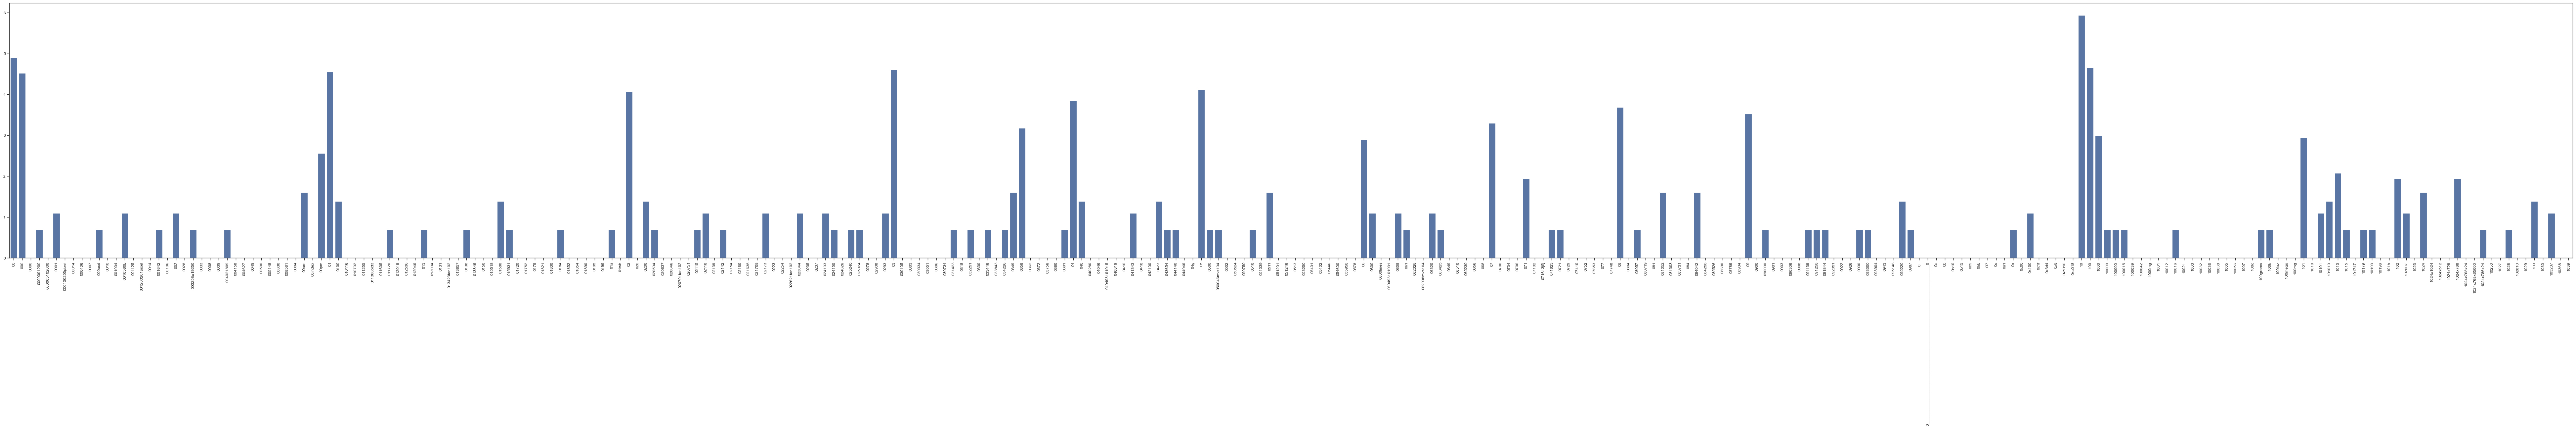

In [16]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [17]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

**Answer:** <br/>
`category_name` 沒有二元化，因為 LabelBinarizer 是用來建立二進制 feature，也代表他會新增一個名為 bin_category 的欄位
如果要直接更改的話要改成使用 `LabelEncoder()`

In [18]:
##### Answer #####
X['bin_category'] = mlb.fit_transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


# **Part 2**

Preprocess another dataset

**1. The Data and Preparation**

In [19]:
# Import the data and concate

data_amazon = pd.read_csv('sentiment-labelled-sentences/amazon_cells_labelled.txt', delimiter = "\t")
data_amazon.columns = ["sentence", "score"]
data_amazon["website"] = "amazon"
data_imdb = pd.read_csv('sentiment-labelled-sentences/imdb_labelled.txt', delimiter = "\t")
data_imdb.columns = ["sentence", "score"]
data_imdb["website"] = "imdb"
data_yelp = pd.read_csv('sentiment-labelled-sentences/yelp_labelled.txt', delimiter = "\t")
data_yelp.columns = ["sentence", "score"]
data_yelp["website"] = "yelp"

data = pd.concat([data_amazon, data_imdb, data_yelp])
data = data.reset_index(drop=True)

data.iloc[::10].head(10)

,sentence,score,website
0,"Good case, Excellent value.",1,amazon
10,He was very impressed when going from the orig...,1,amazon
20,I bought this to use with my Kindle Fire and a...,1,amazon
30,This product is ideal for people like me whose...,1,amazon
40,I was not impressed by this product.,0,amazon
50,good protection and does not make phone too bu...,1,amazon
60,I really recommend this faceplates since it lo...,1,amazon
70,"Even in my BMW 3 series which is fairly quiet,...",0,amazon
80,Not a good bargain.,0,amazon
90,Made very sturdy.,1,amazon


**2. Missing Values and Duplicate Data**

In [20]:
# Check empty or duplicated sentence
print("Empty:", data['sentence'].apply(lambda x: x.strip() == '' or pd.isna(x) or x.lower() in ['nan', 'none']).sum())
print("Duplicated:", data['sentence'].duplicated().sum())

Empty: 0
Duplicated: 17


In [21]:
# Find and print the duplicated ones
sentences = data['sentence']
data[sentences.isin(sentences[sentences.duplicated()])].sort_values(by='sentence')

,sentence,score,website
1588,10/10,1,imdb
1062,10/10,1,imdb
1163,Definitely worth checking out.,1,imdb
1027,Definitely worth checking out.,1,imdb
747,Does not fit.,0,amazon
445,Does not fit.,0,amazon
179,Don't buy this product.,0,amazon
542,Don't buy this product.,0,amazon
401,Excellent product for the price.,1,amazon
891,Excellent product for the price.,1,amazon


In [22]:
# Remove duplicated ones
data.drop_duplicates(keep=False, inplace=True)
sum(data.duplicated('sentence'))

0

**3. Data Preprocessing --Sampling**

Text(0.5, 1.0, 'Score distribution')

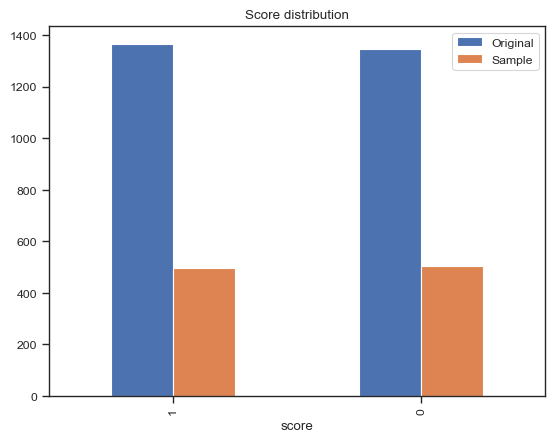

In [23]:
# Sample 1000 sentences from the dataset
data_sample = data.sample(n=1000,random_state=42)

# Draw a chat to compare both distributions
sns.set_theme(style="ticks")
sns.set_context("paper", font_scale=1)

df_test = pd.DataFrame({
    'Original': data['score'].value_counts(), 
    'Sample': data_sample['score'].value_counts()
    }, index=data['score'].value_counts().index)
ax = df_test.plot.bar()
ax.set_title('Score distribution')

**4. Data Preprocessing --Feature Creation**

In [24]:
# unigrams
data['unigrams'] = data['sentence'].apply(lambda x: dmh.tokenize_text(x))
data[0:9]

,sentence,score,website,unigrams
0,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
1,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
2,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."
3,The mic is great.,1,amazon,"[The, mic, is, great, .]"
4,I have to jiggle the plug to get it to line up...,0,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ..."
5,If you have several dozen or several hundred c...,0,amazon,"[If, you, have, several, dozen, or, several, h..."
6,If you are Razr owner...you must have this!,1,amazon,"[If, you, are, Razr, owner, ..., you, must, ha..."
7,"Needless to say, I wasted my money.",0,amazon,"[Needless, to, say, ,, I, wasted, my, money, .]"
8,What a waste of money and time!.,0,amazon,"[What, a, waste, of, money, and, time, !, .]"


**5. Data Preprocessing --Feature Subset Selection with Term Frequency**

In [25]:
# Get document-term matrix
count_vect = CountVectorizer()
data_count = count_vect.fit_transform(data.sentence)
print(data_count.shape)

analyze = count_vect.build_analyzer()
print(analyze(" ".join(list(data[:1].sentence))))
print(count_vect.get_feature_names_out()[0:9])
print(data_count[0:9, 0:9].todense())

(2711, 5149)
['good', 'case', 'excellent', 'value']
['00' '10' '100' '11' '12' '13' '15' '15g' '15pm']
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


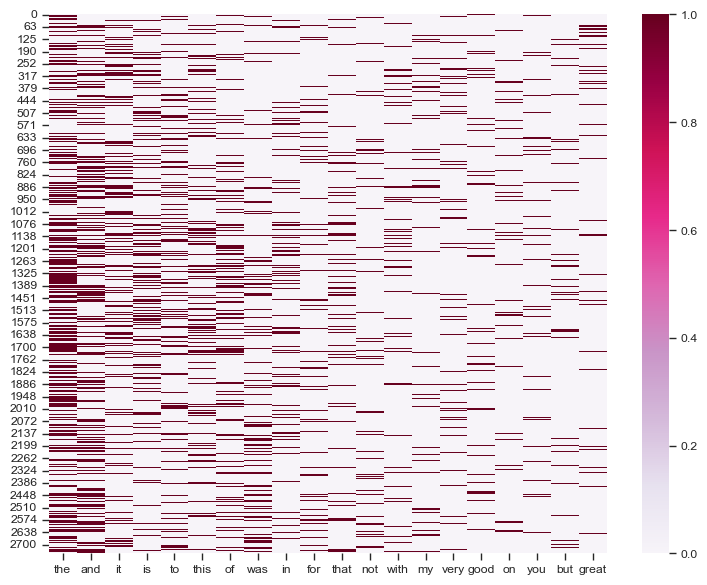

In [26]:
# Draw a heatmap to show the distribution of the top 20 frequent terms
sns.set_context("paper", font_scale=1)

# find the top 20 labels
feature_names = count_vect.get_feature_names_out()
frequencies = data_count.toarray().sum(axis=0)
sorted_indices = (-frequencies).argsort()

top_features = [feature_names[i] for i in sorted_indices[:20]]
top_frequencies = [frequencies[i] for i in sorted_indices[:20]]

df_todraw = pd.DataFrame(data_count[:, sorted_indices[:20]].toarray(), columns=top_features, index=data.index)

plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=False)

**6. Dimensionality Reduction**

In [48]:
# PCA
# visualize the data to check the distribution and distinctness of the classes
# explained_variance_ratio_ to check the percentage of variance explained by each of the selected components
pca = PCA(n_components = 5)
data_reduced = pca.fit_transform(data_count.toarray())

col = ['coral', 'blue', 'black', 'orange']

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    data_reduced,
    labels=labels,
    dimensions=range(5),
    color=data['score'],
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(font=dict(size=8))
fig.show()

# 可以看到即便 PC 數量調整到五維，PC1 仍有 48% 的變異量，與在三維相同
# 所以可以判斷 PC1 是最重要的 PC，而其他 PC 可能含有比較多的 noise 或是比較沒有區分度的資訊

**7. Attribute Transformation or Aggregation**

In [52]:
# Sort by frequency and plot the top 50 terms
term_frequencies = np.asarray(data_count.sum(axis=0))[0]

data_frequency = pd.DataFrame({
    "Term":count_vect.get_feature_names_out(),
    "Frequency":term_frequencies
})

data_frequency = data_frequency.sort_values(by='Frequency', ascending=False)
data_frequency = data_frequency.head(50)

fig = px.bar(data_frequency, x='Term', y="Frequency")
fig.update_xaxes(categoryorder='total descending')
fig.update_xaxes(tickangle=90)
fig.show()

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


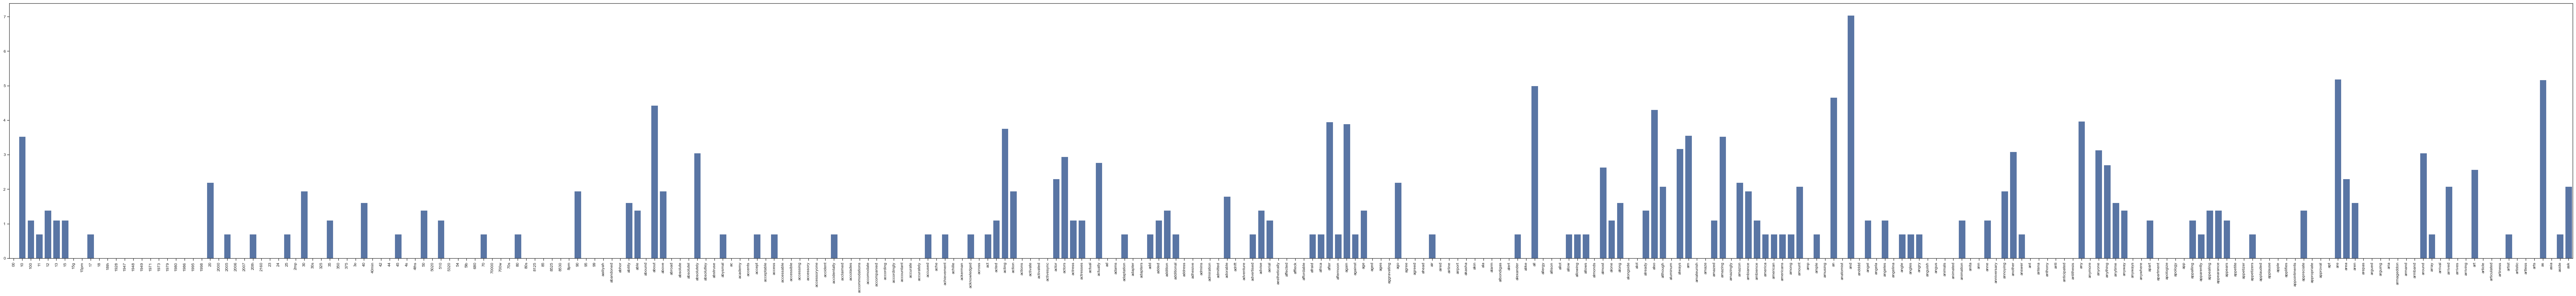

In [57]:
# Log the frequency and plot
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticks(range(300))
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

**8. Discretization and Binarization**

In [58]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['A usable keyboard actually turns a PDA into a real-world useful machine instead of just a neat gadget.']
['Definitely a bargain.']
['I had absolutely no problem with this headset linking to my 8530 Blackberry Curve!']


In [59]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [62]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %f" % cos_sim_count_1_2[0, 0])
print("Cosine Similarity using count bw 1 and 3: %f" % cos_sim_count_1_3[0, 0])
print("Cosine Similarity using count bw 2 and 3: %f" % cos_sim_count_2_3[0, 0])

print("Cosine Similarity using count bw 1 and 1: %f" % cos_sim_count_1_1[0, 0])
print("Cosine Similarity using count bw 2 and 2: %f" % cos_sim_count_2_2[0, 0])
print("Cosine Similarity using count bw 3 and 3: %f" % cos_sim_count_3_3[0, 0])

# 結果顯示，只有在跟自己比對的時候，才會得到 1，其他的都是 0
# 因為 sentence 的內容不多，而且基本上都是不同的，所以 cosine similarity 不太適合用在這裡做為比對方法

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# **Part 3**



**1. Different Visualization Method**

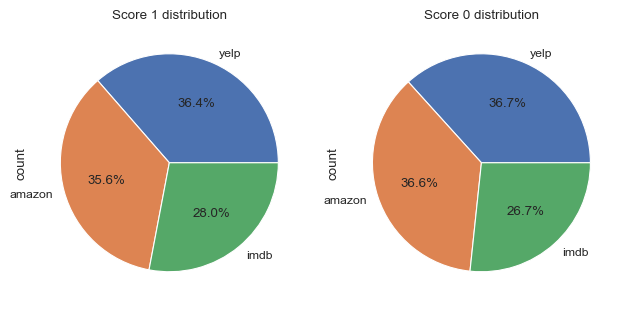

In [63]:
# Draw two pie chart to check score 1 and 0 distribution in different websites
plt.subplot(1, 2, 1)
data[data['score'] == 1]['website'].value_counts().plot(kind = 'pie', title = 'Score 1 distribution', autopct='%1.1f%%')
plt.subplot(1, 2, 2)
data[data['score'] == 0]['website'].value_counts().plot(kind = 'pie', title = 'Score 0 distribution', autopct='%1.1f%%')
plt.tight_layout()
plt.show()

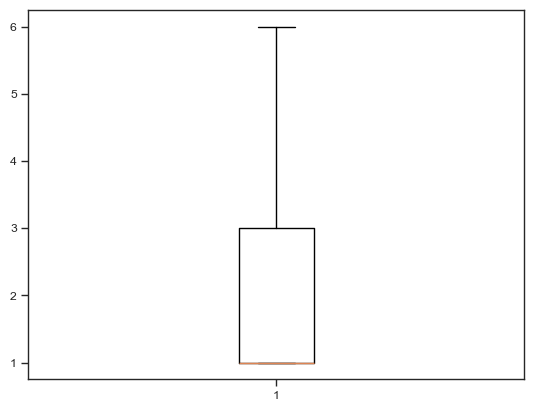

In [70]:
frequency_for_box = {'feature_names': count_vect.get_feature_names_out(), 'frequencies': term_frequencies} 
frequency_for_box = frequency_for_box["frequencies"]
plt.boxplot(frequency_for_box, showfliers=False)
plt.show()

**2. TF-IDF**

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
sentences = data['sentence']
vectorizer = TfidfVectorizer(
    sublinear_tf=True, 
    analyzer='word', # 定義 feature 是詞而不是 char
    max_features=10000, # 允許保留的最大 feature 數量
    ngram_range=(1, 3), # 要提取的 n-gram 的範圍，表示使用三元詞組
    strip_accents='unicode', # 在 preprocessing 中去掉比較慢的 unicode 方法
    token_pattern=r'\w{1,}', # 不管標點符號
    stop_words='english' # 用英文的 stopwords
)

data_vectorizer = vectorizer.fit(sentences)
word_features = vectorizer.transform(sentences)

In [77]:
data_vectorizer.get_feature_names_out()

array(['0', '0 10', '0 acting', ..., 'zombie students',
       'zombie students humans', 'zombiez'], dtype=object)

**3. Naive Bayes**

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

sentences = data['sentence'].values
y = data['score'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1, shuffle=True)

In [110]:
# Count Vectorizer
c_vectorizer = CountVectorizer()
c_vectorizer.fit(sentences_train)

c_X_train = c_vectorizer.transform(sentences_train).toarray()
c_X_test = c_vectorizer.transform(sentences_test).toarray()

# Bernoulli Naive Bayes with Count Vectorizer
bnb = BernoulliNB()
y_pred = bnb.fit(c_X_train, y_train).predict(c_X_test)
score = bnb.score(c_X_test, y_test)
print("=== Bernoulli Naive Bayes with Count Vectorizer ===")
print("Accuracy in test data:", score)
print("Recall in test data:", metrics.recall_score(y_test, y_pred))
print("\n")

# Multiomial Naive Bayes with Count Vectorizer
mnb = MultinomialNB()
y_pred = mnb.fit(c_X_train, y_train).predict(c_X_test)
score = mnb.score(c_X_test, y_test)
print("=== Multiomial Naive Bayes with Count Vectorizer ===")
print("Accuracy in test data:", score)
print("Recall in test data:", metrics.recall_score(y_test, y_pred))
print("\n")

# Gaussian Naive Bayes with Count Vectorizer
gnb = GaussianNB()
y_pred = gnb.fit(c_X_train, y_train).predict(c_X_test)
score = gnb.score(c_X_test, y_test)
print("=== Gaussian Naive Bayes with Count Vectorizer ===")
print("Accuracy in test data:", score)
print("Recall in test data:", metrics.recall_score(y_test, y_pred))
print("\n")

# TF-IDF Vectorizer
t_vectorizer = TfidfVectorizer()
t_vectorizer.fit(sentences_train)

t_X_train = t_vectorizer.transform(sentences_train).toarray()
t_X_test = t_vectorizer.transform(sentences_test).toarray()

# Bernoulli Naive Bayes with TF-IDF Vectorizer
bnb = BernoulliNB()
y_pred = bnb.fit(t_X_train, y_train).predict(t_X_test)
score = bnb.score(t_X_test, y_test)
print("=== Bernoulli Naive Bayes with TF-IDF Vectorizer ===")
print("Accuracy in test data:", score)
print("Recall in test data:", metrics.recall_score(y_test, y_pred))
print("\n")

# Multiomial Naive Bayes with TF-IDF Vectorizer
mnb = MultinomialNB()
y_pred = mnb.fit(t_X_train, y_train).predict(t_X_test)
score = mnb.score(t_X_test, y_test)
print("=== Multiomial Naive Bayes with TF-IDF Vectorizer ===")
print("Accuracy in test data:", score)
print("Recall in test data:", metrics.recall_score(y_test, y_pred))
print("\n")

# Gaussian Naive Bayes with TF-IDF Vectorizer
gnb = GaussianNB()
y_pred = gnb.fit(t_X_train, y_train).predict(t_X_test)
score = gnb.score(t_X_test, y_test)
print("=== Gaussian Naive Bayes with TF-IDF Vectorizer ===")
print("Accuracy in test data:", score)
print("Recall in test data:", metrics.recall_score(y_test, y_pred))

=== Bernoulli Naive Bayes with Count Vectorizer ===
Accuracy in test data: 0.8126843657817109
Recall in test data: 0.7965616045845272


=== Multiomial Naive Bayes with Count Vectorizer ===
Accuracy in test data: 0.8082595870206489
Recall in test data: 0.7851002865329513


=== Gaussian Naive Bayes with Count Vectorizer ===
Accuracy in test data: 0.6578171091445427
Recall in test data: 0.4699140401146132


=== Bernoulli Naive Bayes with TF-IDF Vectorizer ===
Accuracy in test data: 0.8126843657817109
Recall in test data: 0.7965616045845272


=== Multiomial Naive Bayes with TF-IDF Vectorizer ===
Accuracy in test data: 0.8156342182890856
Recall in test data: 0.8108882521489972


=== Gaussian Naive Bayes with TF-IDF Vectorizer ===
Accuracy in test data: 0.7064896755162242
Recall in test data: 0.6246418338108882


In [ ]:
# 這個實驗是進行二元分類，是在做二元的 sentiment analysis (正面評價與負面評價)

# 總結下來 Bernoulli Naive Bayes 在兩種 vectorizer 下的表現都是最好的
# 原因包含了三種 Naive Bayes 的假設：
# Bernoulli Naive Bayes 的假設是每個 feature 都是 binary 的
# Multinomial Naive Bayes 的假設是每個 feature 都是 multinomial distributed 的，適用於多類別
# Gaussian Naive Bayes 的假設是每個 feature 都是 normal distributed 的，適用於連續數據

# 另外 TF-IDF Vectorizer 的表現也比 Count Vectorizer 好
# 因為 TF-IDF Vectorizer 能夠降低高頻詞的權重，也就是將高頻率用詞視為 noise (the, and 等等)
# 反觀 Count Vectorizer 則是將所有詞都視為同等重要，這樣的結果會導致高頻詞的影響力過大

# 因此 Bernoulli Naive Bayes + TF-IDF Vectorizer 是最好的組合

# **Part 4**



我很開心能在第一份作業就可以接觸到很大量且有用的 data processing 與 analyzing 的技巧。

以下是我注意的地方：
1. 以 sentimental labeled sentences 那份 dataset 來說，剛好正面與負面評價的數量相當，因此沒有遇到 unbalanced 的問題，或許會在之後的課程中碰到，我覺得如何判斷 unbalanced data 的處理方式相當重要
2. 如果有建立 sentimental word list 應該可以提升效率，去為不同的情緒詞調整權重，會有助於識別情感內容的分類
3. 標點符號在 preprocessing 過程中沒有特別提及需要移除，但他們不包括任何情感訊息，沒有移除可能會分散分析的內容 (這邊我只在 TF-IDF 部分篩掉)
4. 資料處理的過程中沒有處理大小寫以及時態等，來降低同義詞的多樣性

另外，雖然作業中沒有明確要求，但我覺得最後如果可以以 Part 3 的結果去回顧統計字詞的話，似乎可以更了解情感分析的過程。

謝謝教授以及助教安排本次作業的內容，而且雖然我最後沒有利用到，但提供了 helpers 裡面的模組方便第二部分使用，我覺得整體來說可以很扎實的練習 Python，以及認識所用到的 package，而且也因此培養閱讀 official document 的習慣，也藉由這次作業更具體化上課所學的知識。